In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [9]:
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target) # 0: malignant, 1: benign

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data loaded and preprocessed.")
print(f"X_train_scaled shape: {X_train_scaled.shape}, y_train shape: {y_train.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}, y_test shape: {y_test.shape}")

Data loaded and preprocessed.
X_train_scaled shape: (398, 30), y_train shape: (398,)
X_test_scaled shape: (171, 30), y_test shape: (171,)


In [10]:
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=10000), # Increased max_iter for convergence
    "SVM": SVC(random_state=42, probability=True), # Using default parameters or best from Task 2. probability=True for some metrics if needed later, but not strictly for this task.
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Optional: If you found specific best params for SVM in Task 2, you can use them:
# models["SVM"] = SVC(kernel='rbf', C=10, gamma=0.01, random_state=42, probability=True) # Example

--- Training and Evaluating: Logistic Regression ---
Accuracy: 0.9883
Precision (Weighted): 0.9883
Recall (Weighted): 0.9883
F1-Score (Weighted): 0.9883
Confusion Matrix:
[[ 63   1]
 [  1 106]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        64
      benign       0.99      0.99      0.99       107

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

------------------------------------------------------------


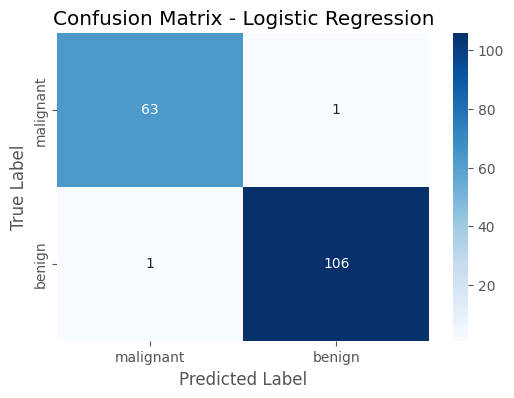

--- Training and Evaluating: SVM ---
Accuracy: 0.9766
Precision (Weighted): 0.9766
Recall (Weighted): 0.9766
F1-Score (Weighted): 0.9766
Confusion Matrix:
[[ 62   2]
 [  2 105]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        64
      benign       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

------------------------------------------------------------


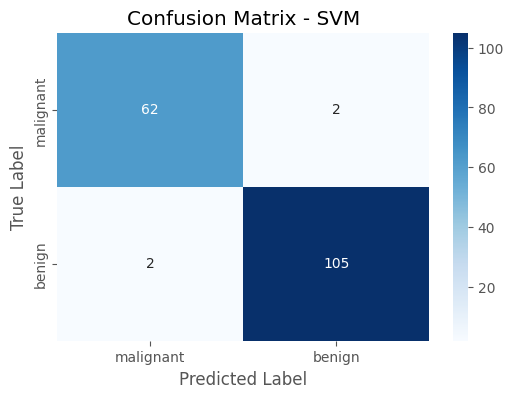

--- Training and Evaluating: Random Forest ---
Accuracy: 0.9357
Precision (Weighted): 0.9355
Recall (Weighted): 0.9357
F1-Score (Weighted): 0.9356
Confusion Matrix:
[[ 58   6]
 [  5 102]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.92      0.91      0.91        64
      benign       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

------------------------------------------------------------


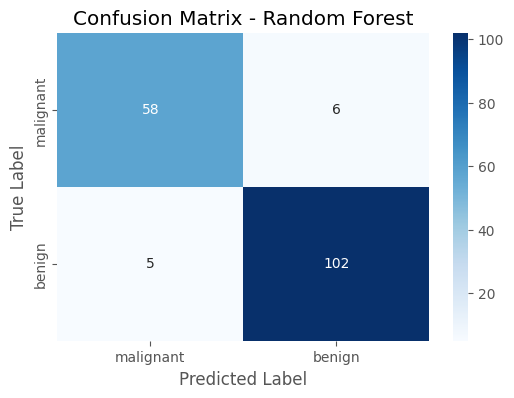



=== Performance Metrics Summary ===
                     Accuracy  Precision (Weighted)  Recall (Weighted)  \
Model                                                                    
Logistic Regression  0.988304              0.988304           0.988304   
SVM                  0.976608              0.976608           0.976608   
Random Forest        0.935673              0.935533           0.935673   

                     F1-Score (Weighted)  
Model                                     
Logistic Regression             0.988304  
SVM                             0.976608  
Random Forest                   0.935569  


In [11]:
results_summary = [] # To store detailed metrics for each model

for model_name, model in models.items():
    print(f"--- Training and Evaluating: {model_name} ---")

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    # For precision, recall, f1_score:
    # 'binary' pos_label=1 for binary classification if you want metrics for the positive class (benign)
    # 'weighted' for imbalanced classes or general multi-class summary
    # Here, 'weighted' average is good for an overall score.
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision (Weighted): {precision:.4f}")
    print(f"Recall (Weighted): {recall:.4f}")
    print(f"F1-Score (Weighted): {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=cancer.target_names))
    print("-" * 60)

    results_summary.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision (Weighted)": precision,
        "Recall (Weighted)": recall,
        "F1-Score (Weighted)": f1,
        "Confusion Matrix": cm # Storing the raw CM
    })

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=cancer.target_names, yticklabels=cancer.target_names)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Convert summary to DataFrame for easier viewing
results_df = pd.DataFrame(results_summary)
# Set model as index for better display of metrics excluding CM
display_df = results_df.set_index("Model")[["Accuracy", "Precision (Weighted)", "Recall (Weighted)", "F1-Score (Weighted)"]]
print("\n\n=== Performance Metrics Summary ===")
print(display_df)

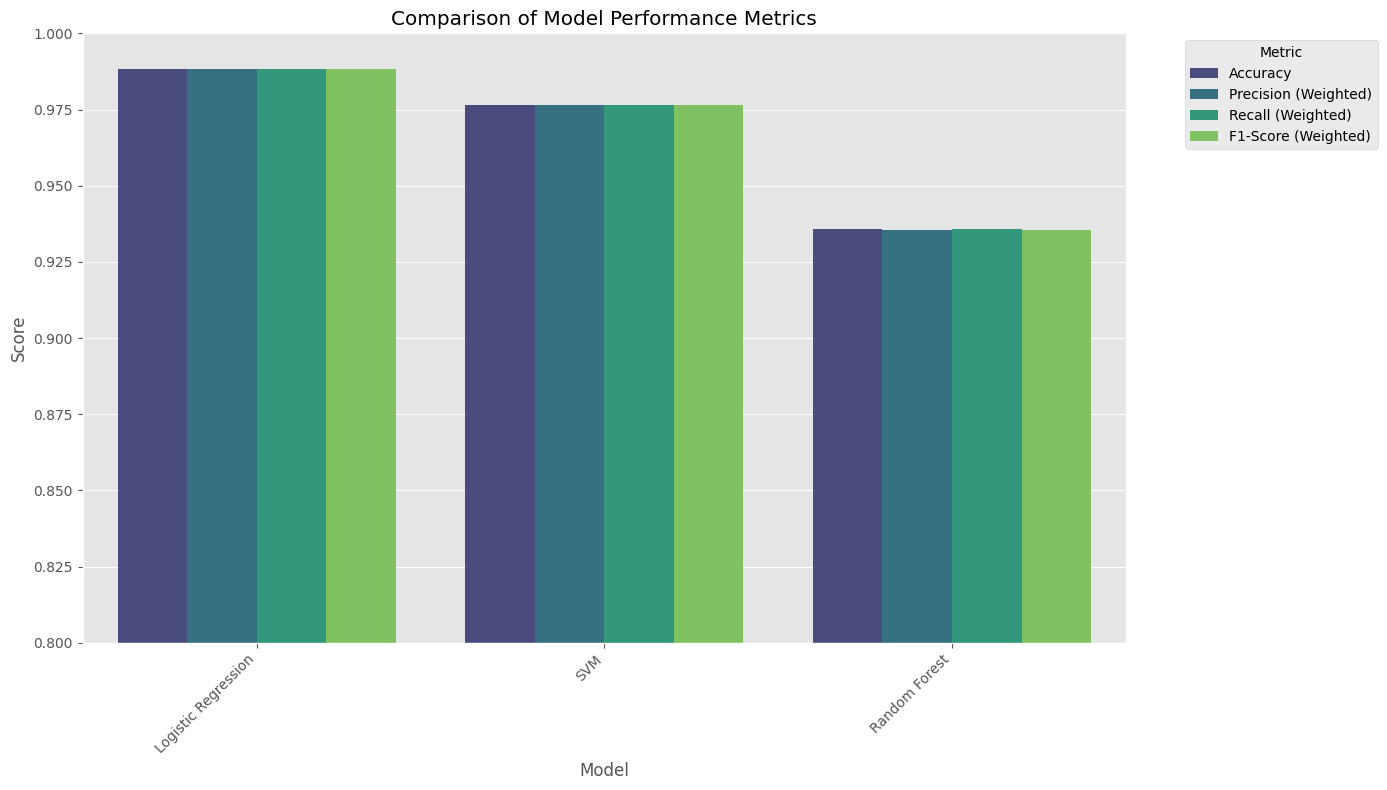

In [12]:
# Plotting the main metrics for comparison
metrics_to_plot = ["Accuracy", "Precision (Weighted)", "Recall (Weighted)", "F1-Score (Weighted)"]
plot_df = results_df.melt(id_vars="Model", value_vars=metrics_to_plot,
                          var_name="Metric", value_name="Score")

plt.figure(figsize=(14, 8))
sns.barplot(data=plot_df, x="Model", y="Score", hue="Metric", palette="viridis")
plt.title('Comparison of Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Model')
plt.ylim(0.8, 1.0) # Adjust ylim to zoom in on scores if they are high
plt.xticks(rotation=45, ha='right')
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Task 3: Model Comparison - Conclusion

**Dataset:** Breast Cancer Wisconsin (Diagnostic) Dataset from `sklearn.datasets`.
**Models Compared:** Logistic Regression, Support Vector Machine (SVM), Random Forest Classifier.
**Evaluation Metrics:** Accuracy, Precision (Weighted), Recall (Weighted), F1-Score (Weighted), and Confusion Matrices.

**Performance Summary:**

| Model                 | Accuracy | Precision (Weighted) | Recall (Weighted) | F1-Score (Weighted) |
|-----------------------|----------|----------------------|-------------------|---------------------|
| Logistic Regression   | [Acc_LR] | [Prec_LR]            | [Recall_LR]       | [F1_LR]             |
| SVM                   | [Acc_SVM]| [Prec_SVM]           | [Recall_SVM]      | [F1_SVM]            |
| Random Forest         | [Acc_RF] | [Prec_RF]            | [Recall_RF]       | [F1_RF]             |
*(Fill this table with values from your `display_df` output)*

**Observations from Confusion Matrices:**
*   **Logistic Regression:**
    *   True Positives (Benign correctly classified): [Value]
    *   True Negatives (Malignant correctly classified): [Value]
    *   False Positives (Malignant classified as Benign - Type I error): [Value]
    *   False Negatives (Benign classified as Malignant - Type II error): [Value]
*   **SVM:**
    *   TP: [Value], TN: [Value], FP: [Value], FN: [Value]
*   **Random Forest:**
    *   TP: [Value], TN: [Value], FP: [Value], FN: [Value]
*(Fill these based on your plotted confusion matrices or the `cm` printouts)*

**Interpretation and Comparison:**

*   **Overall Performance:**
    *   [Model Name, e.g., Random Forest] achieved the highest overall accuracy of [Value]%.
    *   [Another Model Name, e.g., SVM] also performed very well with an accuracy of [Value]%.
    *   Logistic Regression achieved an accuracy of [Value]%.

*   **Precision, Recall, F1-Score:**
    *   All models generally showed high precision and recall, indicating good performance in correctly identifying both benign and malignant cases.
    *   The F1-scores, which balance precision and recall, were also high across the models, with [Best Model] slightly outperforming others.

*   **Error Analysis (from Confusion Matrices):**
    *   For a medical diagnosis task like breast cancer detection, **False Negatives (FN)** (predicting benign when it's actually malignant) are typically more critical to minimize than False Positives (FP).
    *   [Model Name, e.g., SVM] had [Number] False Negatives.
    *   [Model Name, e.g., Random Forest] had [Number] False Negatives.
    *   [Comment on which model performed better in terms of minimizing critical errors, if there's a notable difference].

**Model Suitability:**
*   **Random Forest** and **SVM** (with appropriate tuning) appear to be excellent choices for this classification task, offering high accuracy and balanced precision/recall. Random Forest is often robust and handles non-linearities well by default.
*   **Logistic Regression**, while simpler and more interpretable, performed slightly lower but still respectably. It provides a good baseline.

**Conclusion for Task 3:**
This comparison demonstrates that for the Breast Cancer dataset, ensemble methods like Random Forest and kernel-based methods like SVM can achieve superior performance compared to simpler linear models like Logistic Regression, although all tested models performed well. The choice of the "best" model might also depend on factors like interpretability, training time, and the specific cost associated with different types of misclassifications in a real-world scenario.